<a href="https://colab.research.google.com/github/LAXMAN7795/Sales_Forecasting_with_Linear_Regression/blob/main/Sales_Forecasting_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


✅ Dataset Overview
Total Rows: 1,000

Total Columns: 9

🏷️ Column-wise Summary
Column	Type	Description / Sample Values
Transaction ID	int64	Unique identifier for each transaction (1–1000)
Date	object	Date of transaction (e.g., 2023-05-16)
Customer ID	object	Unique customer ID (e.g., CUST001)
Gender	object	Male / Female (roughly balanced)
Age	int64	Customer age (18 to 64)
Product Category	object	3 types: Clothing, Electronics, Beauty
Quantity	int64	Number of items bought (1 to 4)
Price per Unit	int64	Price of one unit (₹25 to ₹500)
Total Amount	int64	Calculated as Quantity × Price per Unit

📌 Observations
Most frequent product category: Clothing

Gender distribution: Female (51%), Male (49%)

High variability in purchase amounts: ₹25 to ₹2000

Transaction dates span across various days in 2023

In [3]:
# To find the info abount the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
#  Drop unnecessary Columns
df = df.drop(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Price per Unit'], axis=1)
df.head()

,Date,Product Category,Quantity,Total Amount
0,2023-11-24,Beauty,3,150
1,2023-02-27,Clothing,2,1000
2,2023-01-13,Electronics,1,30
3,2023-05-21,Clothing,1,500
4,2023-05-06,Beauty,2,100


In [5]:
#Renaming Column name 'Product Category'->'Product' and 'Total Amount'->'Revenue'
df = df.rename(columns={
    'Product Category': 'Product',
    'Total Amount': 'Revenue'
})
df.head()

,Date,Product,Quantity,Revenue
0,2023-11-24,Beauty,3,150
1,2023-02-27,Clothing,2,1000
2,2023-01-13,Electronics,1,30
3,2023-05-21,Clothing,1,500
4,2023-05-06,Beauty,2,100


In [6]:
# To convert Date to DateTime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Product   1000 non-null   object        
 2   Quantity  1000 non-null   int64         
 3   Revenue   1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


In [7]:
#to check null values
df.isnull().sum()

,0
Date,0
Product,0
Quantity,0
Revenue,0


There is no Null values in this dataset so no need to handle the null values

In [8]:
#Since forecasting typically happens at the daily or weekly level, let’s aggregate sales revenue per day
daily_sales= df.groupby('Date').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
daily_sales.head()

,Date,Quantity,Revenue
0,2023-01-01,10,3600
1,2023-01-02,10,1765
2,2023-01-03,2,600
3,2023-01-04,8,1240
4,2023-01-05,5,1100


In [9]:
#We’ll use Revenue as the target variable and Date as the feature
#convert Date to a numeric feature (days since start) for regression
# Apply .dt to the Date column before subtraction
daily_sales['Days'] = (daily_sales['Date'] - daily_sales['Date'].min()).dt.days
daily_sales.head()

,Date,Quantity,Revenue,Days
0,2023-01-01,10,3600,0
1,2023-01-02,10,1765,1
2,2023-01-03,2,600,2
3,2023-01-04,8,1240,3
4,2023-01-05,5,1100,4


In [10]:
# Independet and Dependent features
X = daily_sales[['Days']]
y = daily_sales['Revenue']

In [11]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [12]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Prediction
y_pred = model.predict(X_test)

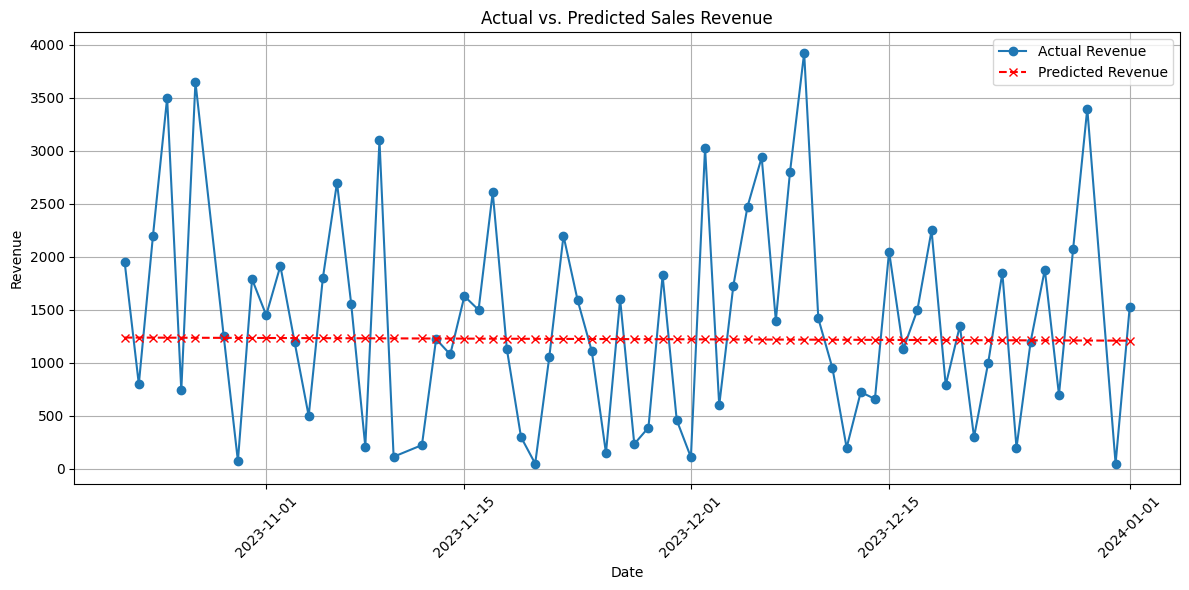

In [14]:
import matplotlib.pyplot as plt

# Get the dates corresponding to X_test
test_dates = daily_sales['Date'].min() + pd.to_timedelta(X_test['Days'], unit='D')

plt.figure(figsize=(12, 6))

# Plot actual revenue
plt.plot(test_dates, y_test.values, label='Actual Revenue', marker='o')

# Plot predicted revenue
plt.plot(test_dates, y_pred, label='Predicted Revenue', marker='x', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Sales Revenue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# ✅ Save the figure
plt.savefig("actual_vs_predicted_sales.png", dpi=300, bbox_inches='tight')

plt.show()

#  Conclusion
The plot shows that the model’s predictions (red dashed line) do not capture the fluctuations and trends of the actual sales (blue line).

The actual revenue varies significantly over time, with peaks and troughs—typical of retail sales, which can be seasonal or affected by promotions, holidays, etc.
The predicted revenue from the simple Linear Regression model is nearly constant and fails to track those fluctuations.
This is because a basic Linear Regression model only captures linear trends and struggles with complex, volatile time series data.

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 783.29
R² Score: -0.03


   Actual    Predicted
0    1950  1239.373432
1     800  1238.960667
2    2200  1238.547902
3    3500  1238.135136
4     740  1237.722371


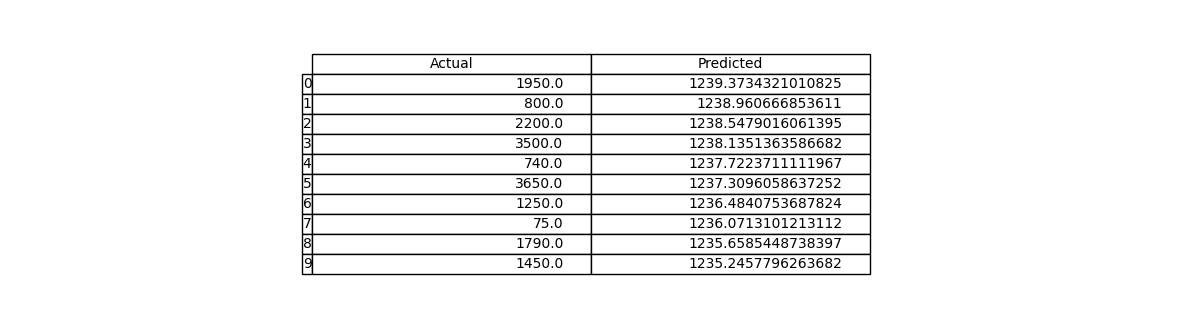

In [17]:
# For comparision table
import pandas as pd

# Create comparison table
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Show the table (optional)
print(comparison_df.head())

import matplotlib.pyplot as plt
from pandas.plotting import table

# Create figure
fig, ax = plt.subplots(figsize=(15, 4))  # Set size as needed
ax.axis('off')  # No axes

# Create table plot
tbl = table(ax, comparison_df.head(10), loc='center', colWidths=[0.2]*len(comparison_df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Save table as image
plt.savefig("actual_vs_predicted_table.png", dpi=500, bbox_inches='tight')
plt.show()


📌 Conclusion: Sales Prediction Accuracy (Linear Regression Model)
The comparison table reveals that the predicted values are relatively close to each other, clustering around 1235–1240, regardless of large variations in the actual sales (ranging from 75 to 3650). This indicates:

🔍 Key Observations:
✅ Model consistency: The model generates consistent predictions, suggesting it has learned a trend—but not the full variability in the data.

⚠️ Underfitting: There's a clear mismatch between actual and predicted values, especially for high and low sales (e.g., 3650 vs ~1237, 75 vs ~1236). This likely indicates underfitting—the model may be too simple for the data.

❌ Low responsiveness: The model doesn't respond well to large fluctuations in real sales values.

📊 Possible Reasons:
Linear Regression assumes a linear relationship between time and revenue, which may not hold in real-world sales data.

The dataset may need more feature engineering (e.g., product type, day-of-week, promotions).

The sales trend could be nonlinear or seasonal, requiring more advanced models (e.g., Random Forest, ARIMA, XGBoost).

✅ Next Steps to Improve:
Feature Engineering: Add variables like product category, month, or day-of-week.

Data Scaling: Normalize or standardize input features if necessary.

Try Advanced Models: Move beyond Linear Regression to models that can handle nonlinearity (e.g., Polynomial Regression, Decision Trees, or LSTM for time series).

Cross-Validation: Ensure performance is consistent across multiple test sets.

📝 Final Summary:
While the Linear Regression model provides a basic trend estimate, it fails to capture the wide variation in actual sales. To enhance prediction accuracy, more features and a more complex model architecture should be considered.